<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [152]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [153]:
#Loads the sat_scores.csv file
with open('sat_scores.csv', 'rb') as f:
    reader = csv.reader(f)
    sat_list = list(reader)
    print sat_list

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [154]:
#put raw_sat_file into a dict

# To sort by columns
unzipped = zip(*sat_list)


#Make a list of values and obtain the key
state_values = list(unzipped[0][1:])
state_key = unzipped[0][0]

#Make a list of values and obtain the key
rate_values = list(unzipped[1][1:])
rate_key = unzipped[1][0]

#Make a list of values and obtain the key
verbal_values = list(unzipped[2][1:])
verbal_key = unzipped[2][0]

#Make a list of values and obtain the key
math_values = list(unzipped[3][1:])
math_key = unzipped[3][0]

#Insert key and list of values into sat_dict 
sat_dict ={state_key: state_values, rate_key: rate_values, verbal_key: verbal_values, math_key: math_values}
sat_dict


{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [155]:
#load raw sat data using pandas
sat_df = pd.read_csv('sat_scores.csv')
print sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [156]:
#Make df with Sat dict
convert_dict_df = sat_df.from_dict(sat_dict)
print convert_dict_df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [157]:
#First 10 rows
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [158]:
sat_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [159]:
"""format = {State : {Description : "This describes the state"}, {Type : String}, {Shape : (1,10)}...
              ............................................}
          """

#Get the list of columns that will act as our outer key
outer_key = list(sat_df.columns)
print  'Outer key:' , list(sat_df.columns)


#Get description column
description = ['These are states', 'These are rates', 'These are verbals', 'These are maths']
print  'Description: ', description


#Get datatype column
data_type =[]
for i in sat_df.dtypes:
    data_type.append(i)
print  'Data type: ', data_type


#Get shape column
shape = []
for i in sat_df:
    x = (sat_df[i].shape)
    shape.append(x)
print 'Shape :', shape


#Make description ,type and size a list of tuples 
outer_value = zip(description, data_type, shape)
#print 'Outer Value', outer_value


#Create the inner_keys structure
inner_keys =['Description', 'DataTypes', 'Shape']




#{k:dict(zip(inner_keys,list(v))) for k,v in data_dict.items()}




mydict ={}
for i,k in enumerate(outer_key):
    values = outer_value[i]
    inner_dict =dict(zip(inner_keys,values))
    mydict[k] = inner_dict
print mydict

    

Outer key: ['State', 'Rate', 'Verbal', 'Math']
Description:  ['These are states', 'These are rates', 'These are verbals', 'These are maths']
Data type:  [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
Shape : [(52L,), (52L,), (52L,), (52L,)]
{'Math': {'Shape': (52L,), 'DataTypes': dtype('int64'), 'Description': 'These are maths'}, 'State': {'Shape': (52L,), 'DataTypes': dtype('O'), 'Description': 'These are states'}, 'Rate': {'Shape': (52L,), 'DataTypes': dtype('int64'), 'Description': 'These are rates'}, 'Verbal': {'Shape': (52L,), 'DataTypes': dtype('int64'), 'Description': 'These are verbals'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

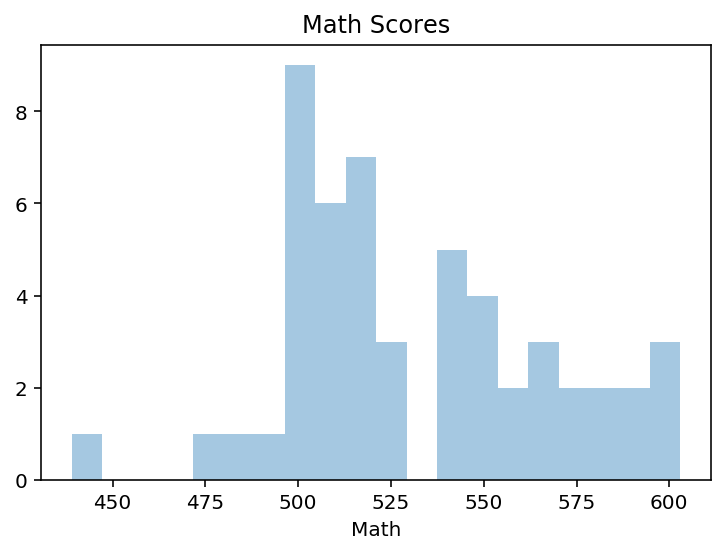

In [160]:
#Plot Math
sns.distplot(sat_df['Math'],kde =False,bins =20);
plt.title('Math Scores');

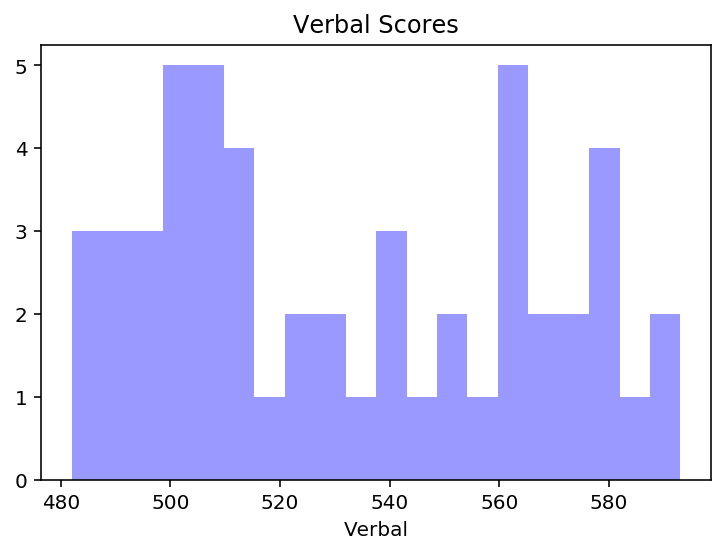

In [161]:
#Plot Verbal
sns.distplot(sat_df['Verbal'],kde =False,color ='b',bins =20)
plt.title('Verbal Scores');

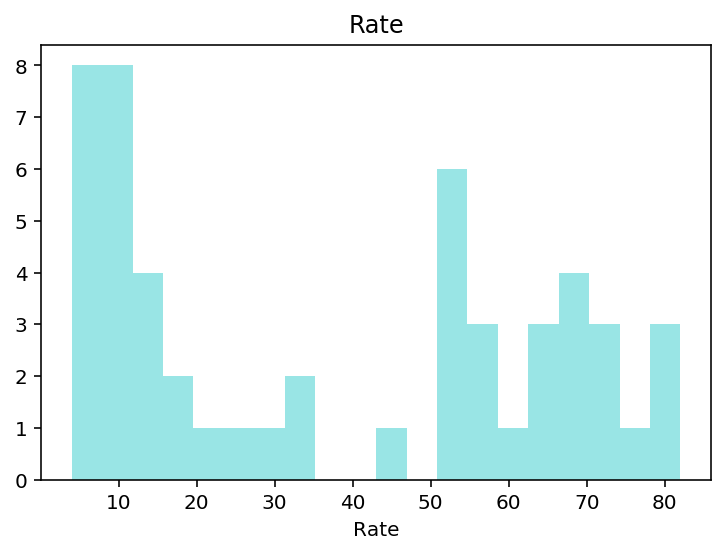

In [162]:
#Plot Rate

sns.distplot(sat_df['Rate'],kde =False,color ='c',bins =20);
plt.title('Rate');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

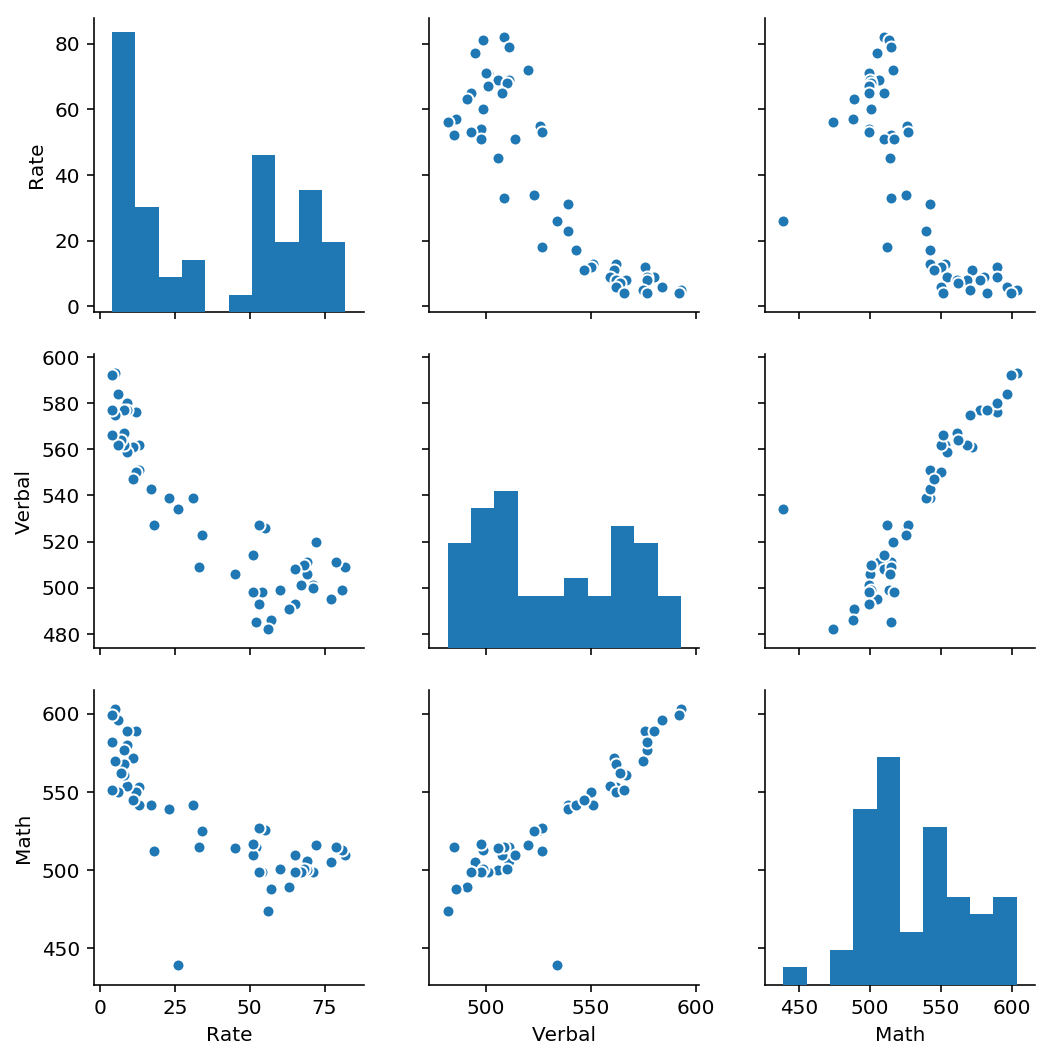

In [163]:
sns.pairplot(sat_df);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

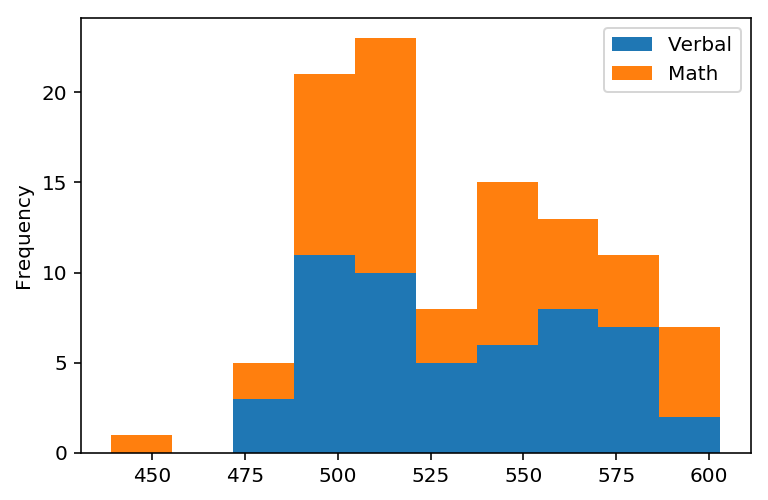

In [164]:
sat_df[['Verbal','Math']].plot(kind ='hist' ,stacked =True);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

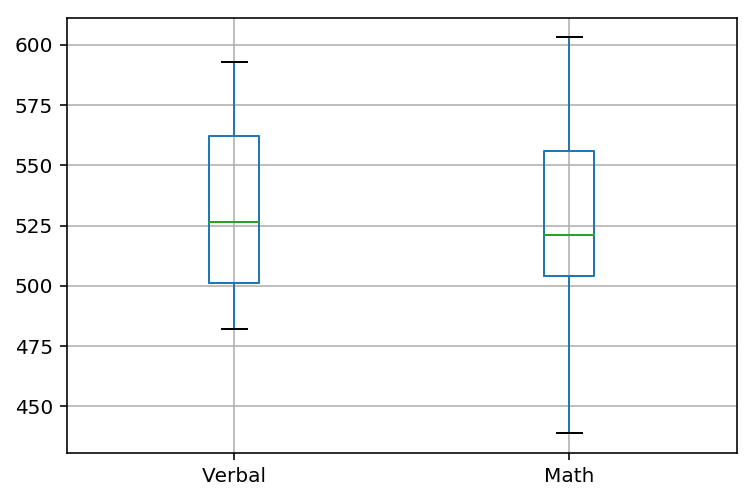

In [165]:
sat_df[['Verbal','Math']].boxplot();

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


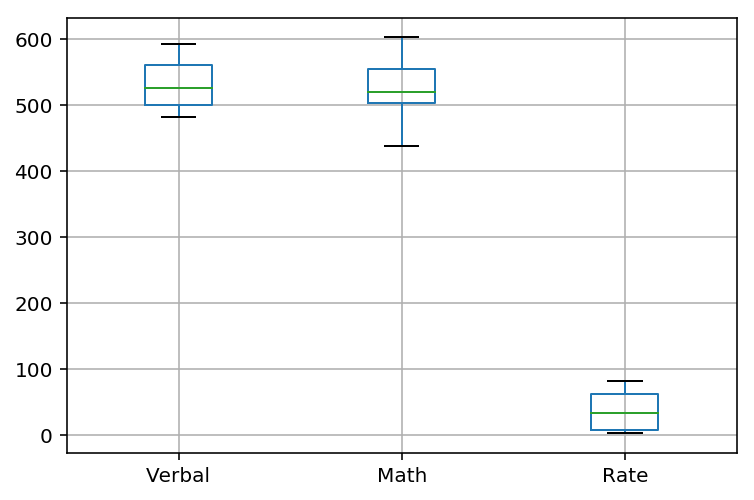

In [166]:
sat_df[['Verbal','Math','Rate']].boxplot();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [167]:
#Prints list of states that have verbal scores greater than ave
print sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]['State']


#Print the total count
print 'No. of states above the mean: ', sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]['State'].count()

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
No. of states above the mean:  24


**Count of states = 52, No. of states abv mean = 24, which is a little under half(26). We can ssume for distribution to be normal, but more information must be provided, for eg: by plotting it. Previous plots shows that it was not so.**

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [168]:
#Prints list of states that have verbal scores greater than median
print sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]['State']


#Print the total count
print 'No. of states above the median: ', sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]['State'].count()

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
No. of states above the median:  26


**The median is higher than the mean by a count of 2. Maybe there is a slight right skew?**

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [169]:
#Get diff and put in new column called 'Diff'
sat_df['Diff'] = sat_df['Verbal'] - sat_df['Math']
sat_df

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [170]:
first_df =sat_df.sort_values(['Diff'], ascending= False).head(10)
print first_df.head(3)

inverse_df =sat_df.sort_values(['Diff'], ascending= True).head(10)
print inverse_df.head(3)

   State  Rate  Verbal  Math  Diff
27    OH    26     534   439    95
50    MS     4     566   551    15
29    WV    18     527   512    15
   State  Rate  Verbal  Math  Diff
21    HI    52     485   515   -30
23    CA    51     498   517   -19
1     NJ    81     499   513   -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


          Verbal      Math      Rate
Verbal  1.000000  0.899871 -0.886432
Math    0.899871  1.000000 -0.773746
Rate   -0.886432 -0.773746  1.000000


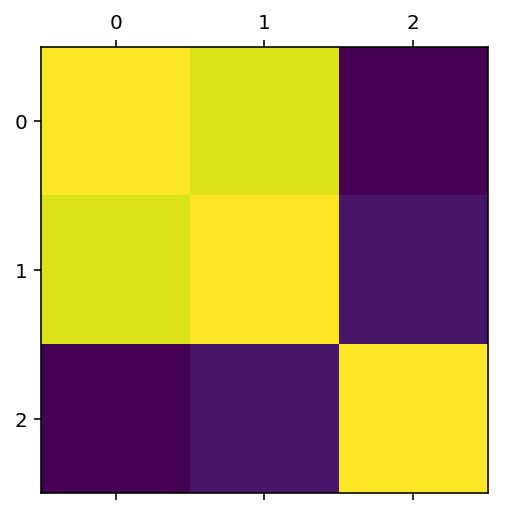

In [171]:
print sat_df[['Verbal','Math','Rate']].corr()
plt.matshow(sat_df[['Verbal','Math','Rate']].corr());

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [172]:
sat_df.describe()

,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [173]:
print sat_df[['Verbal','Math','Rate']].cov()


             Verbal         Math        Rate
Verbal  1104.646682  1077.147059 -804.355958
Math    1077.147059  1297.078431 -760.803922
Rate    -804.355958  -760.803922  745.387632


**Ans:**
Covariance is before standardizing, it is hard to compare between different variables. <br>
Correlation is after standardizing to make it comparable. <br>
You do so by dividing covariance by their SDs.<br>
Afterwhich, we can compare strength and direction of the correlation


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [174]:
#Load the data
drug_df = pd.read_csv("drug-use-by-age.csv" )

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [175]:
#Check out the first 5 rows to get a feel for the data
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [176]:
#Check for shape
drug_df.shape
print 'There are {} rows and {} columns'.format(drug_df.shape[0], drug_df.shape[1])

There are 17 rows and 28 columns


In [177]:
#Check for duplicate values
drug_df.duplicated().sum()
print 'There are no duplicated rows'

There are no duplicated rows


In [178]:
#Check column datatypes
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [179]:
# Melt the data for drug use to get overall distribution
drug_use = drug_df[['age','alcohol-use','marijuana-use','cocaine-use', 'crack-use', 'heroin-use',\
       'hallucinogen-use', 'inhalant-use','pain-releiver-use', 'oxycontin-use',\
       'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]
drug_melted=pd.melt(drug_use, id_vars =['age'],var_name ='drugs')
drug_melted.head(10)

,age,drugs,value
0,12,alcohol-use,3.9
1,13,alcohol-use,8.5
2,14,alcohol-use,18.1
3,15,alcohol-use,29.2
4,16,alcohol-use,40.1
5,17,alcohol-use,49.3
6,18,alcohol-use,58.7
7,19,alcohol-use,64.6
8,20,alcohol-use,69.7
9,21,alcohol-use,83.2


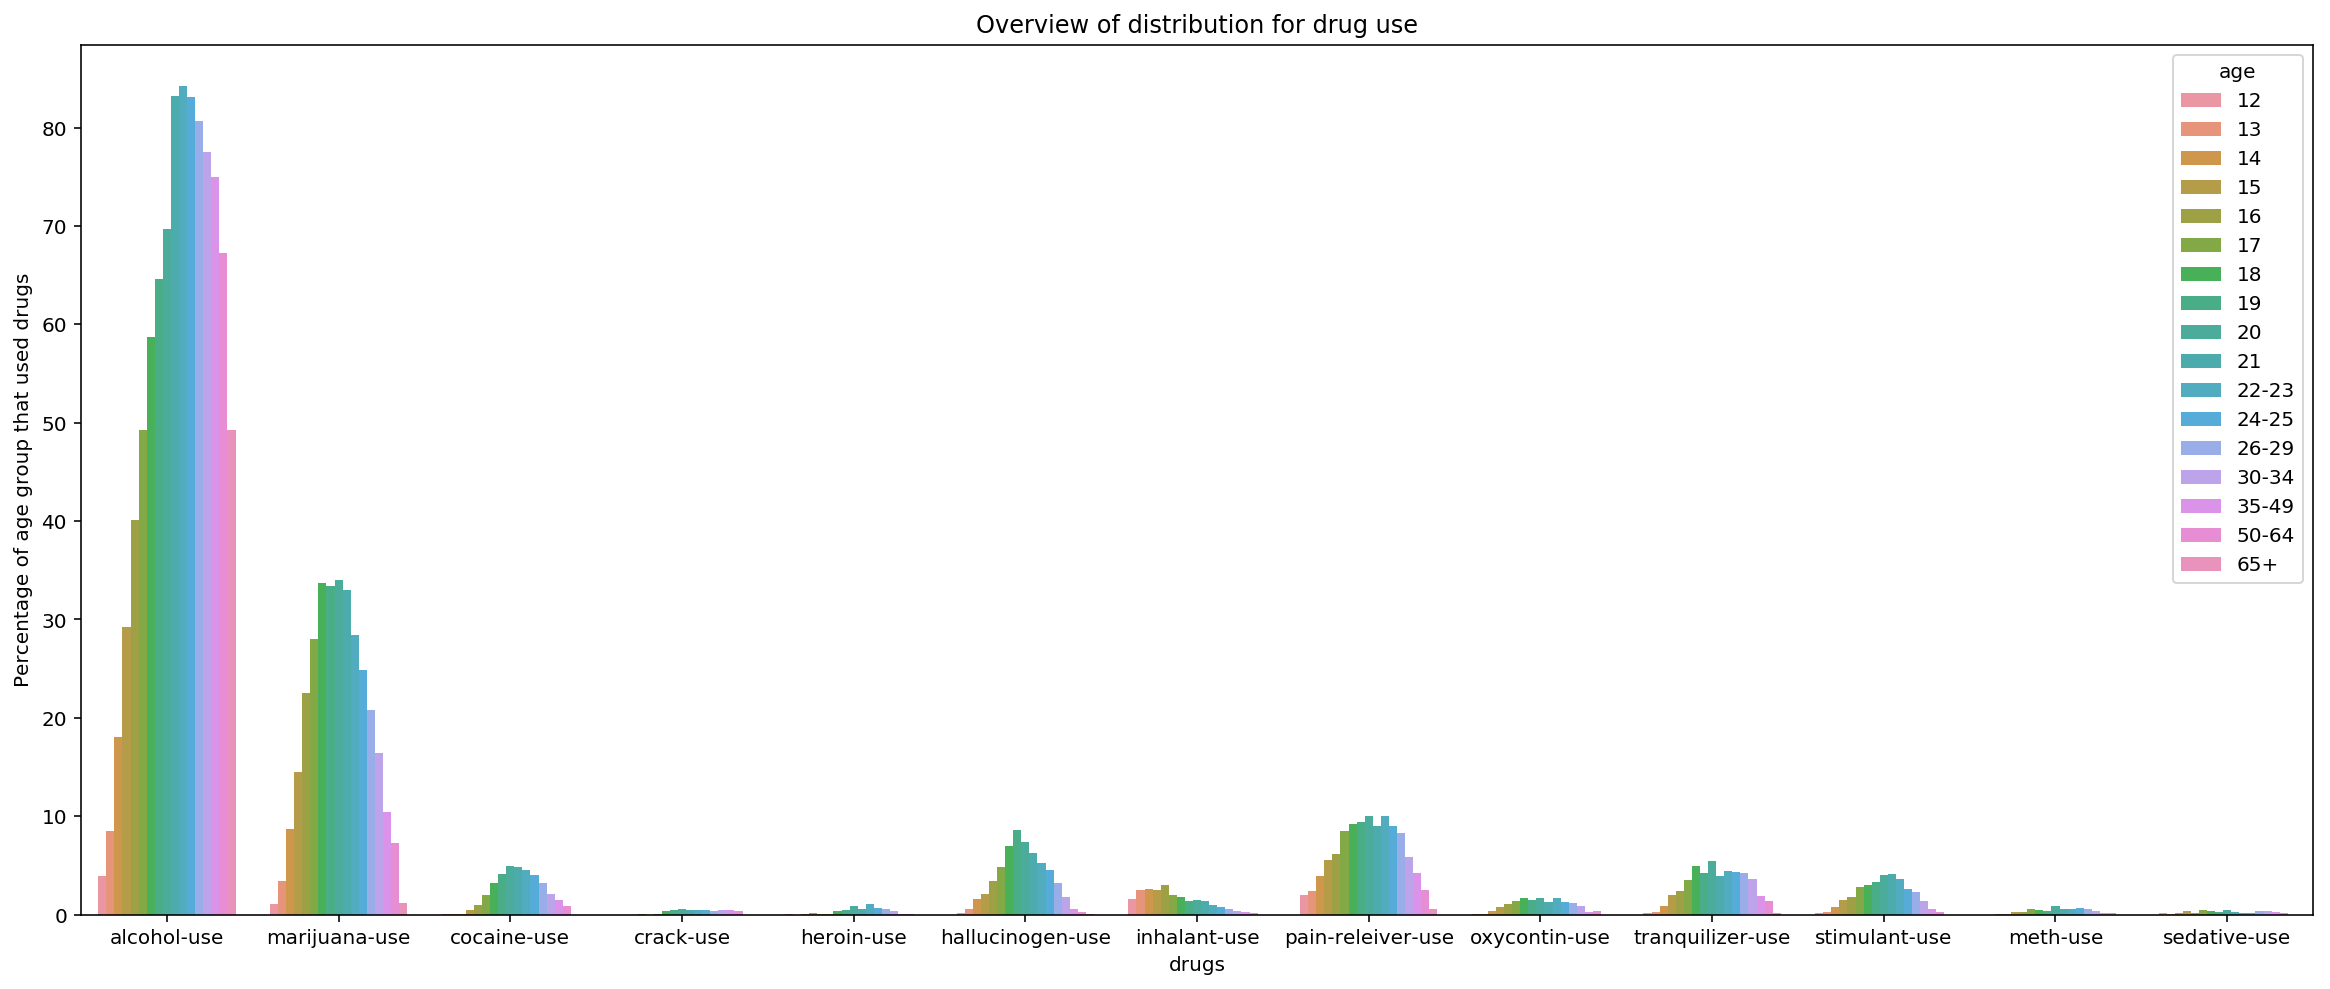

In [180]:
plt.figure(figsize =(20,8))
plt.title('Overview of distribution for drug use')
sns.barplot(data= drug_melted, x = 'drugs', y = 'value',hue ='age').set(ylabel ='Percentage of age group that used drugs');

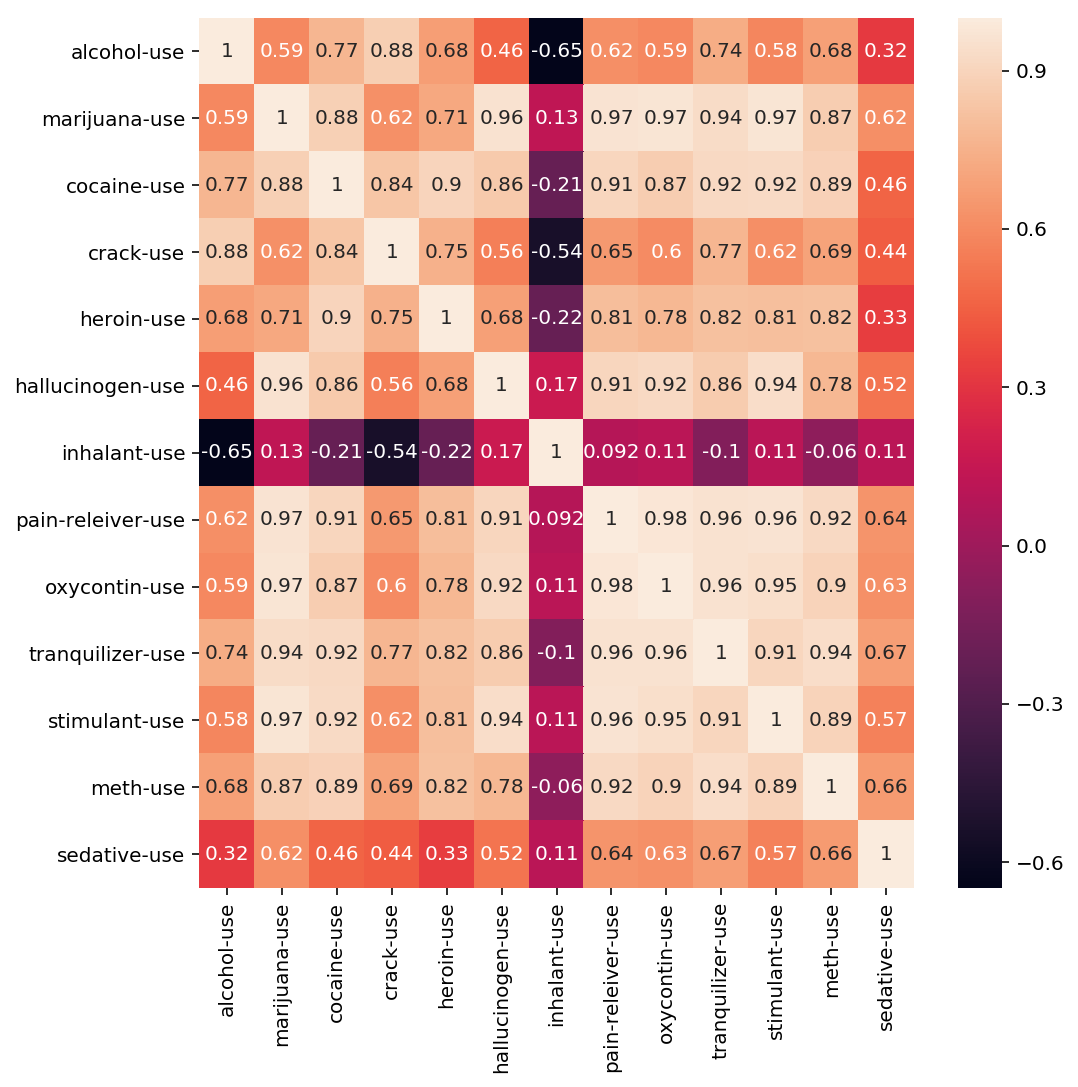

In [212]:
plt.figure(figsize =(8,8))
sns.heatmap(drug_use.corr(),annot =True);

In [204]:
# Melt the data for drug frequency to get overall distribution
drug_frequency = drug_df[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency', 'crack-frequency', 'heroin-frequency',\
       'hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency', 'oxycontin-frequency',\
       'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']]
drug_melted_f=pd.melt(drug_frequency, id_vars =['age'],var_name ='drugs')
drug_melted_f.head()

,age,drugs,value
0,12,alcohol-frequency,3.0
1,13,alcohol-frequency,6.0
2,14,alcohol-frequency,5.0
3,15,alcohol-frequency,6.0
4,16,alcohol-frequency,10.0


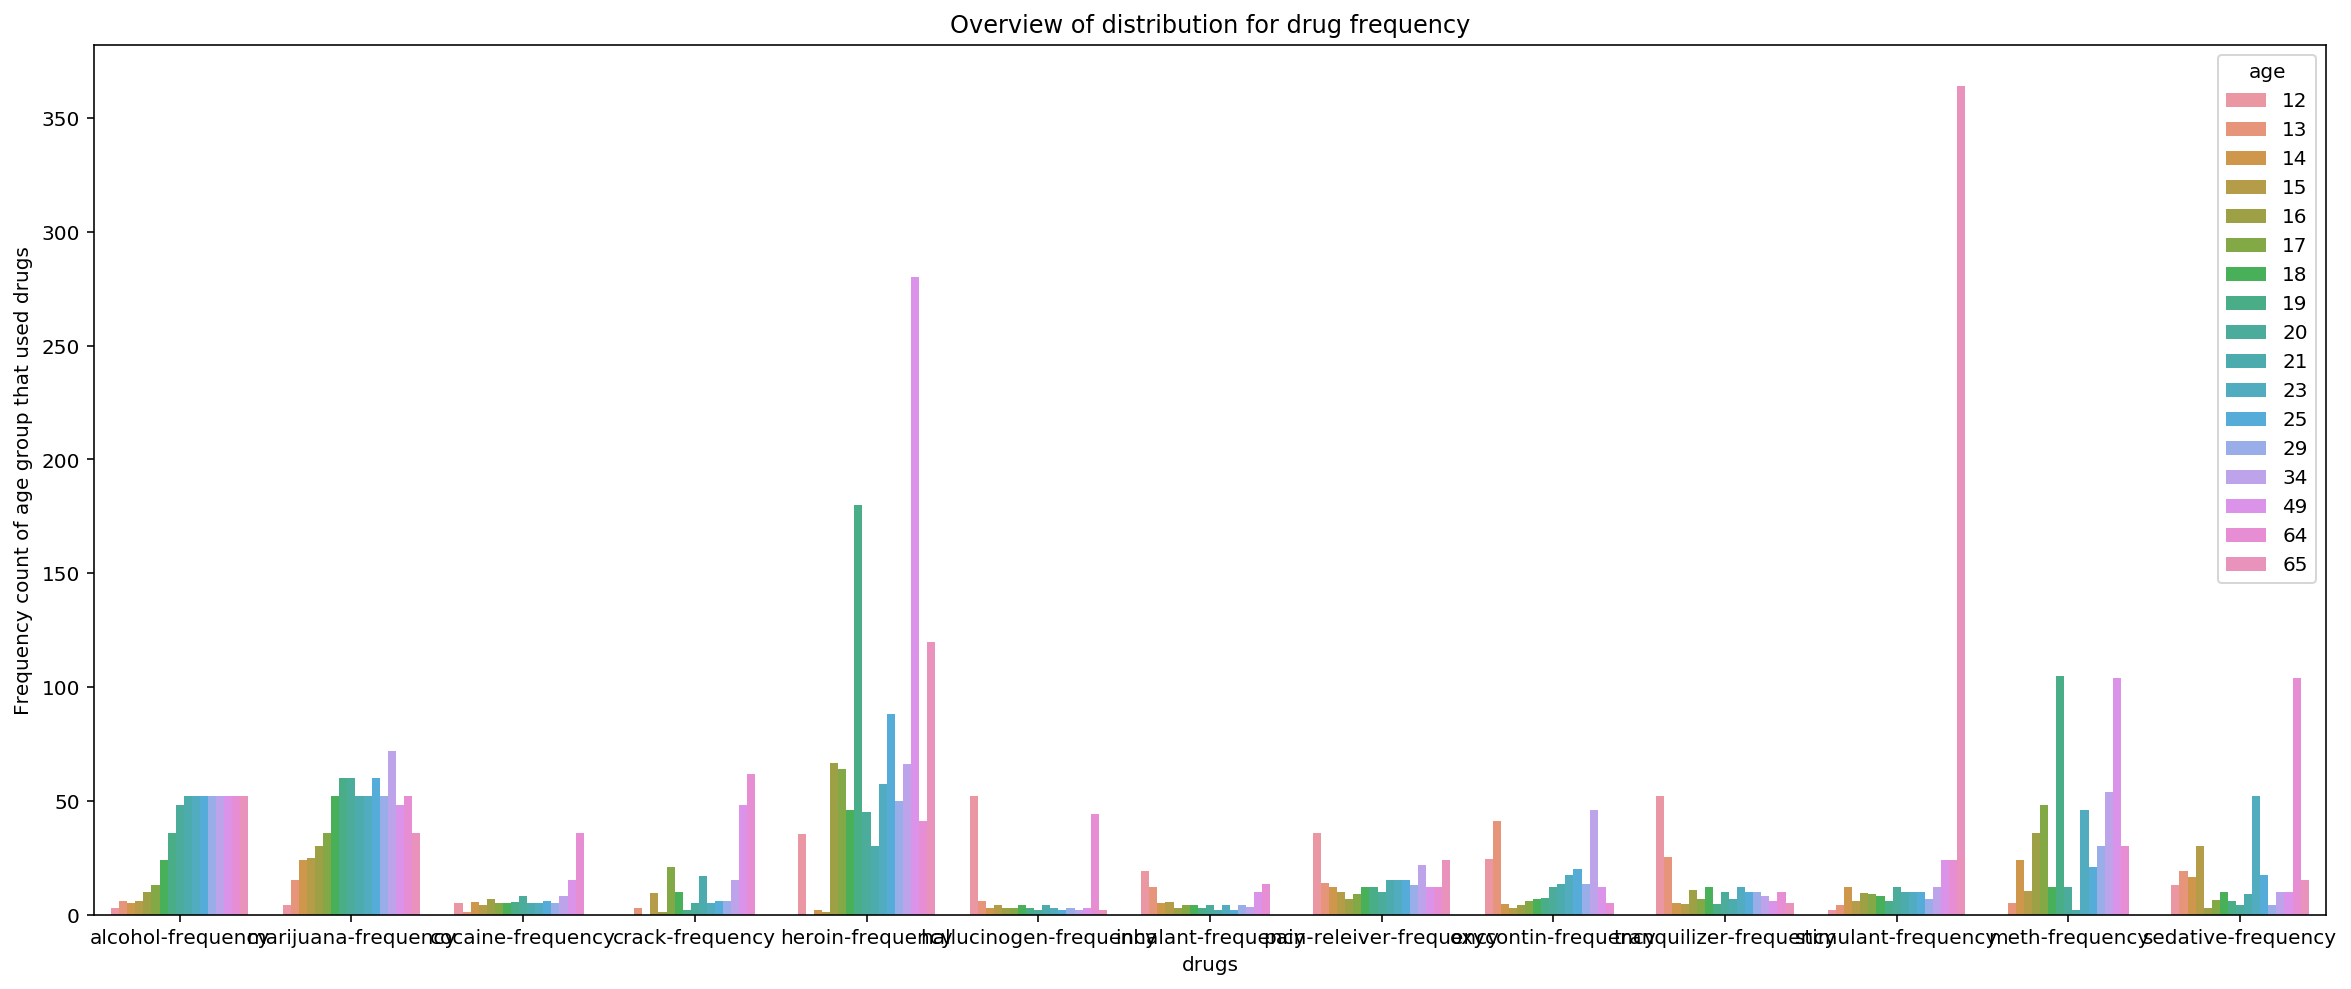

In [205]:
# Run the codes below first to change to numeric as this cant plot without doing so
plt.figure(figsize =(20,8))
plt.title('Overview of distribution for drug frequency')
sns.barplot(data= drug_melted_f, x = 'drugs', y = 'value',hue ='age').set(ylabel ='Frequency count of age group that used drugs');

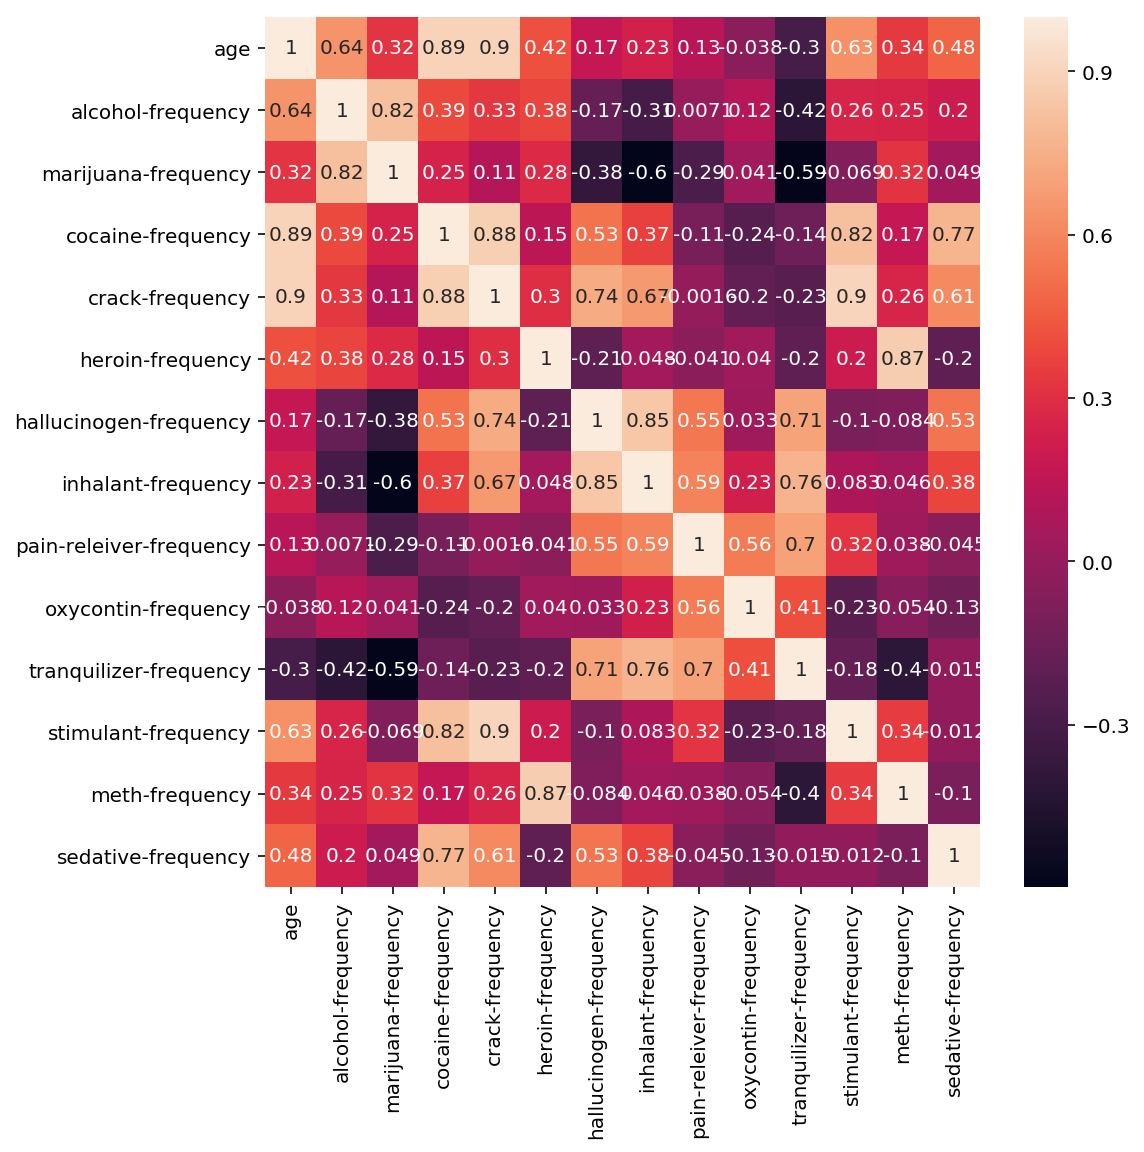

In [211]:
plt.figure(figsize =(8,8))
sns.heatmap(drug_frequency.corr(),annot =True);

In [185]:
#Seeems to have many dtypes of objects when they should have been int/float, thus we print them to get clearer view
print 'dtype = object:'
for i in drug_df:
    if drug_df[i].dtypes == ('O'):
        print i

dtype = object:
age
cocaine-frequency
crack-frequency
heroin-frequency
inhalant-frequency
oxycontin-frequency
meth-frequency


In [186]:
#Check the unique values of the data to inform our decision of how to clean them.
#Seems like many of them have '-',hence they were cast into object dtypes.

print 'unique age: ', drug_df['age'].unique()
print 'unique cocaine-frequency: ', drug_df['cocaine-frequency'].unique()
print 'unique crack-frequency: ', drug_df['crack-frequency'].unique()
print 'unique heroin-frequency: ', drug_df['heroin-frequency'].unique()
print 'inhalant-frequency: ', drug_df['inhalant-frequency'].unique()
print 'oxycontin-frequency: ', drug_df['oxycontin-frequency'].unique()
print 'meth-frequencyy: ', drug_df['meth-frequency'].unique()

unique age:  ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
unique cocaine-frequency:  ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
unique crack-frequency:  ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
unique heroin-frequency:  ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
inhalant-frequency:  ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
oxycontin-frequency:  ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
meth-frequencyy:  ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [187]:
#Try to change these said columns to appropriate data types
#drug_df['cocaine-frequency'].astype(float) didnt work due to special characters

drug_df['cocaine-frequency'] = pd.to_numeric(drug_df['cocaine-frequency'], errors = 'coerce')
drug_df['crack-frequency'] = pd.to_numeric(drug_df['crack-frequency'], errors = 'coerce')
drug_df['heroin-frequency'] = pd.to_numeric(drug_df['heroin-frequency'], errors = 'coerce')
drug_df['inhalant-frequency'] = pd.to_numeric(drug_df['inhalant-frequency'], errors = 'coerce')
drug_df['oxycontin-frequency'] = pd.to_numeric(drug_df['oxycontin-frequency'], errors = 'coerce')
drug_df['meth-frequency'] = pd.to_numeric(drug_df['meth-frequency'], errors = 'coerce')

In [188]:
#Clean the drug_df['age'] column and change it to int type

#We first split the '-', which returns each item as lists, containing the split values
drug_df['age'] = drug_df['age'].apply(lambda x:x.split('-'))

# #Get the max number in each list
drug_df['age'] = drug_df['age'].apply(lambda x:max(x))

#Replace the 65+ to 65
drug_df['age'].replace(['65+'],65, inplace =True)

#Change the column to int
drug_df['age'] = drug_df['age'].astype(int)

In [189]:
drug_df.index =drug_df['age']

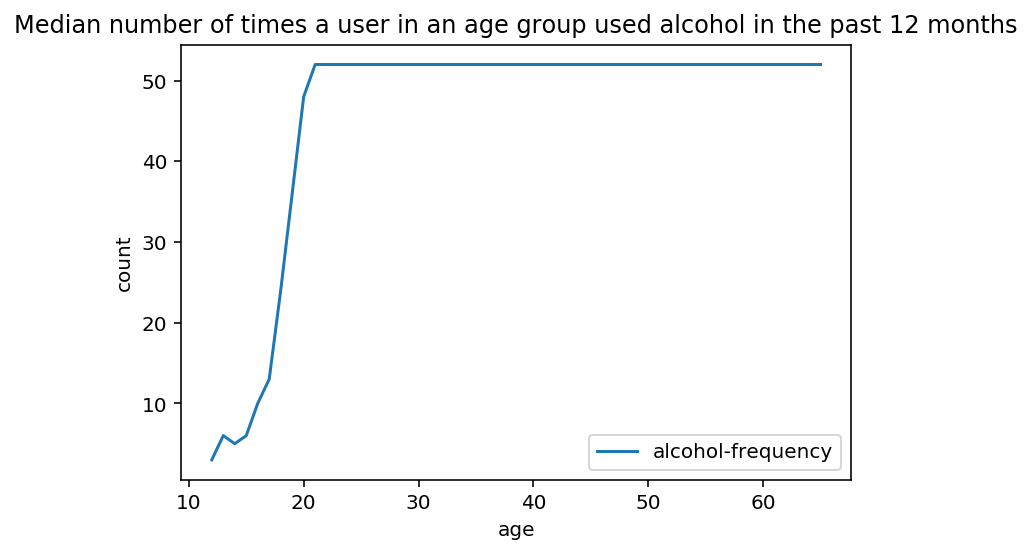

In [190]:
#Get intial view for alcohol frequency
drug_df[['alcohol-frequency']].plot(kind = 'line')
plt.title('Median number of times a user in an age group used alcohol in the past 12 months')
plt.ylabel('count');

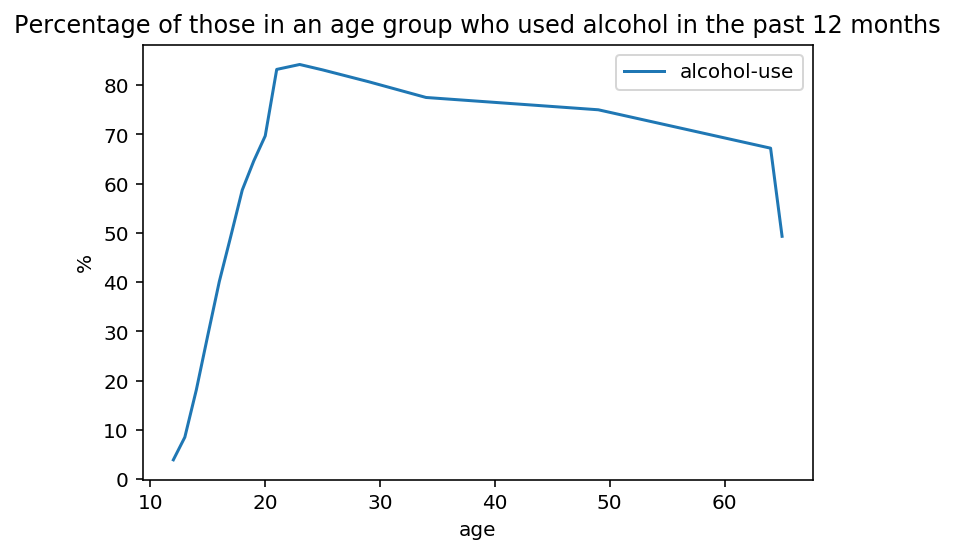

In [191]:
#Get intial view for alcohol use
drug_df[['alcohol-use']].plot(kind = 'line')
plt.title('Percentage of those in an age group who used alcohol in the past 12 months')
plt.ylabel('%');

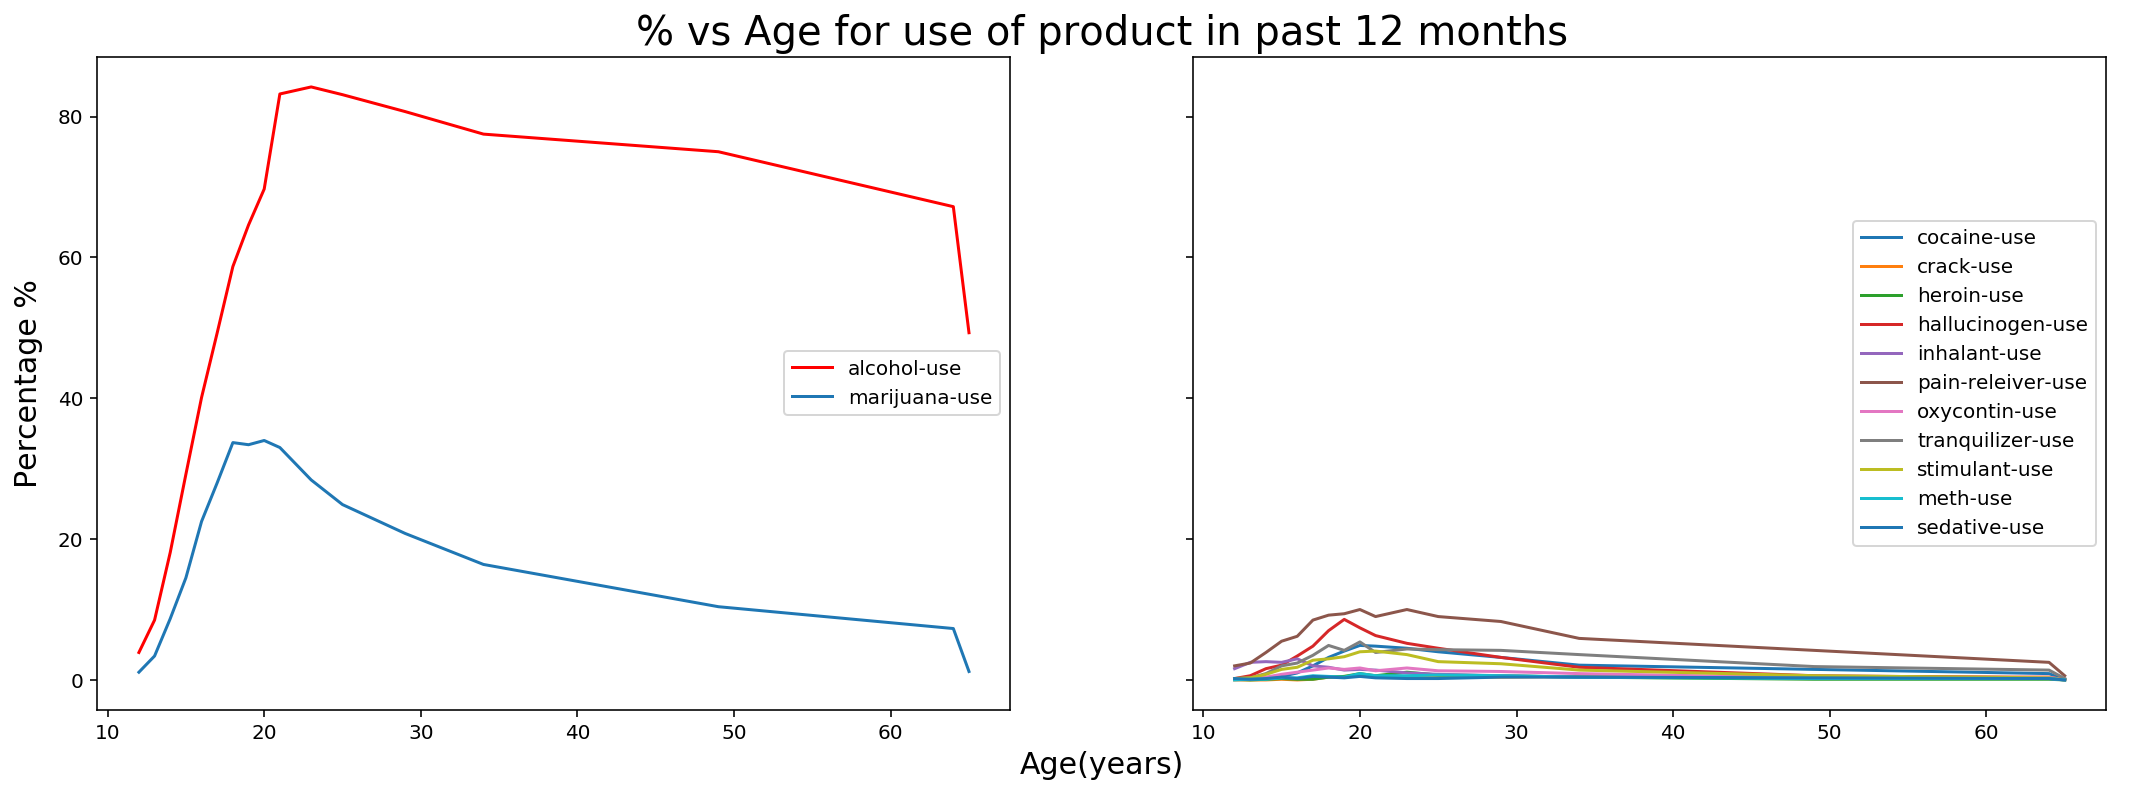

In [192]:
#Plot for all product use
#Create a subplot that shares both x-axis and y-axis

fig,axes =plt.subplots(1,2,sharex =True,sharey =True,figsize =(18,6))
axes[0].plot(drug_df['alcohol-use'],color ='r')
axes[0].plot(drug_df['marijuana-use'])

axes[1].plot(drug_df[['cocaine-use', 'crack-use', 'heroin-use',\
       'hallucinogen-use', 'inhalant-use','pain-releiver-use', 'oxycontin-use',\
       'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']])


#Create a huge subplot so that i can have a common y and x label
fig.add_subplot(111, frameon=False)

#hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

#Label my x and y axis and set legend
plt.xlabel("Age(years)", fontsize = 15)
plt.ylabel("Percentage %", fontsize = 15)
plt.title('% vs Age for use of product in past 12 months',fontsize =20)
axes[0].legend(loc ='right')
axes[1].legend(drug_df[['cocaine-use', 'crack-use', 'heroin-use',\
       'hallucinogen-use', 'inhalant-use','pain-releiver-use', 'oxycontin-use',\
       'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']],loc ='right');


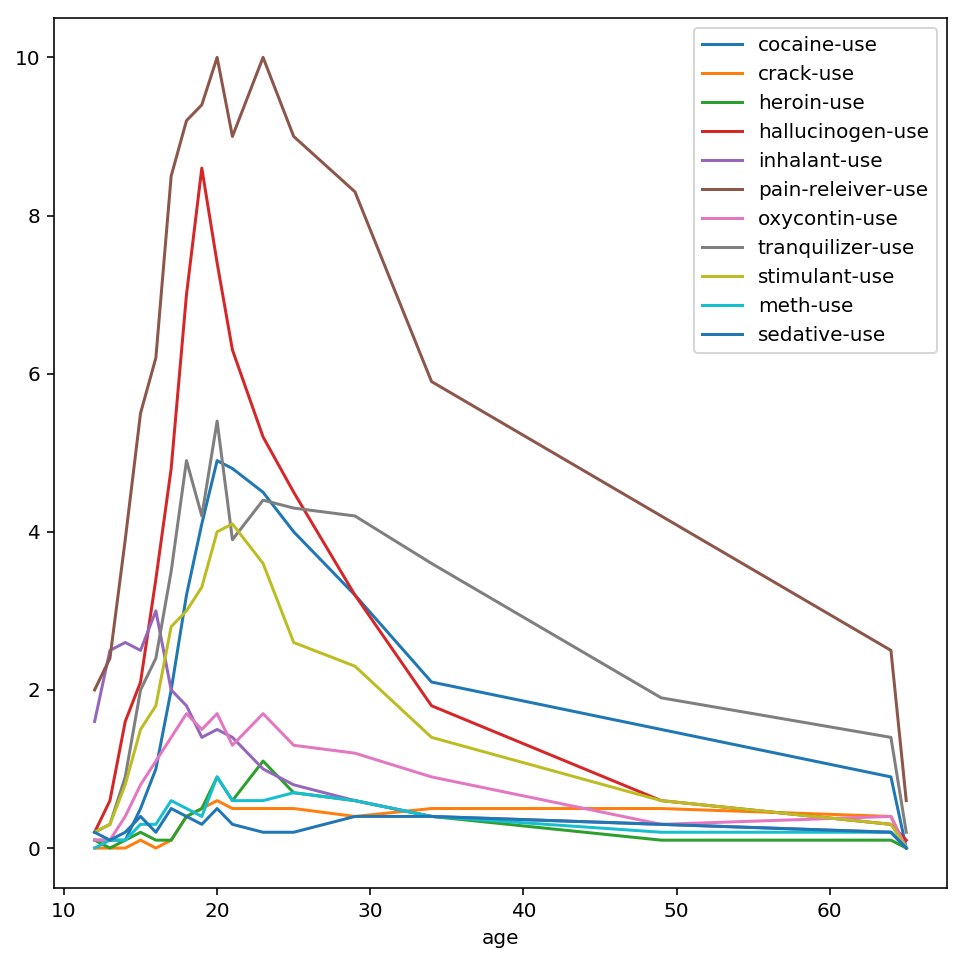

In [193]:
#Zoom in on other products except alcohol and marijuana
drug_df[['cocaine-use', 'crack-use', 'heroin-use',\
       'hallucinogen-use', 'inhalant-use','pain-releiver-use', 'oxycontin-use',\
       'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']].plot(figsize = (8,8));

**Final findings**
All products seem to have increased to a peak around 20 yers of age, then gradually drop till after 60, wherby there was a sharp decrease.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


**Hypo: **
link between percentage of age group use of product and meidan count of product?
Not really.

strong positive correlation for alcohol, marijuana.

But sedative use and heroin use is weak negative correlation

Thus we can only compare product by product

In [194]:
print drug_df[['alcohol-use','alcohol-frequency']].corr()
print drug_df[['marijuana-use','marijuana-frequency']].corr()
print drug_df[['sedative-use','sedative-frequency']].corr()
print drug_df[['heroin-use','heroin-frequency']].corr()

                   alcohol-use  alcohol-frequency
alcohol-use           1.000000           0.897889
alcohol-frequency     0.897889           1.000000
                     marijuana-use  marijuana-frequency
marijuana-use              1.00000              0.61561
marijuana-frequency        0.61561              1.00000
                    sedative-use  sedative-frequency
sedative-use            1.000000           -0.284234
sedative-frequency     -0.284234            1.000000
                  heroin-use  heroin-frequency
heroin-use          1.000000         -0.121704
heroin-frequency   -0.121704          1.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

**1) Pull out the rate variable from the sat dataset**

In [195]:
sat_df['Rate'].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

**2) Are there outliers in the dataset? Define, in words, how you numerically define outliers.**

Outliers in the dataset can be defined as the number of datapoints that are above an arbitary standard deviation. 
If we define outliers as more than 3 std from the mean, we can find a range of values to see if there are outliers.<br>
After computing, we realise that there are no outliers as the data all fall within -44 and 120

In [196]:

#Find spread of rate column
rate_std = sat_df['Rate'].std()
print 'Std: ', rate_std

#Find mean of rate column
rate_mean = sat_df['Rate'].mean()
print 'Mean: ', rate_mean

print 'Any data outside of {} and {} will be outliers' .format((rate_mean - rate_std *3), (rate_mean + rate_std*3) )

Std:  27.3017880729
Mean:  37.1538461538
Any data outside of -44.7515180648 and 119.059210372 will be outliers


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [197]:
#Calculate spearman correlation
spearmancorr = stats.spearmanr(sat_df['Verbal'], sat_df['Math'])
spearmancorr

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

**We rank both columns according to size, in ascending order, afterwhich we comapre the correlation between the ranked values**

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [198]:
#Convert rate column to percentiles
sat_df['Rate_percentile'] = sat_df['Rate'].apply(lambda x: stats.percentileofscore(sat_df['Rate'],x))

In [199]:
#Percentile of California in Rate
sat_df[sat_df['State'] == 'CA']

,State,Rate,Verbal,Math,Diff,Rate_percentile
23,CA,51,498,517,-19,56.730769


3?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

**1) Percentile scoring is useful as it allows us to see how large/small a data is compared to the rest of the dataset**

In [200]:
#Percentile score the alcohol use column and create as new column
drug_df['alcohol-use-percentile'] = drug_df['alcohol-use'].apply(lambda x: stats.percentileofscore(drug_df['alcohol-use'],x))

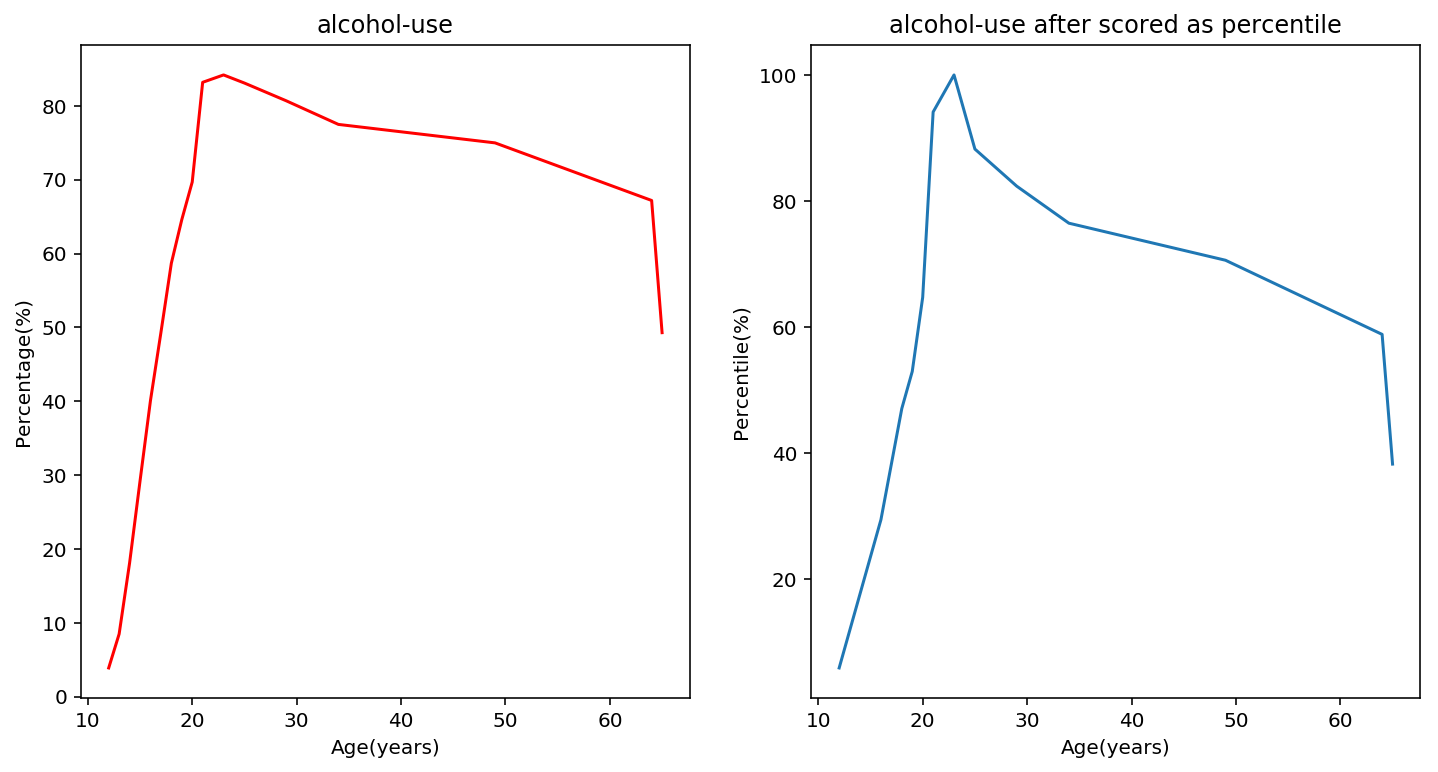

In [201]:
# Create two subplots comparing alcohol-use, and alcohol-use after scored as a percentile
fig,axes =plt.subplots(1,2, figsize=(12,6))
axes[0].plot(drug_df['alcohol-use'],color ='r')
axes[1].plot(drug_df['alcohol-use-percentile'])

#Set title
axes[0].set_title('alcohol-use')
axes[1].set_title('alcohol-use after scored as percentile')

#Setx and ylabels
axes[0].set_ylabel('Percentage(%)')
axes[1].set_ylabel('Percentile(%)')

axes[0].set_xlabel('Age(years)')
axes[1].set_xlabel('Age(years)');


**4) We can see that we have strectched out the y-axis after converting to percentiles. This caused the graph to have a sharper peak around the age of 20. However, the overall shape have remained unchanged**

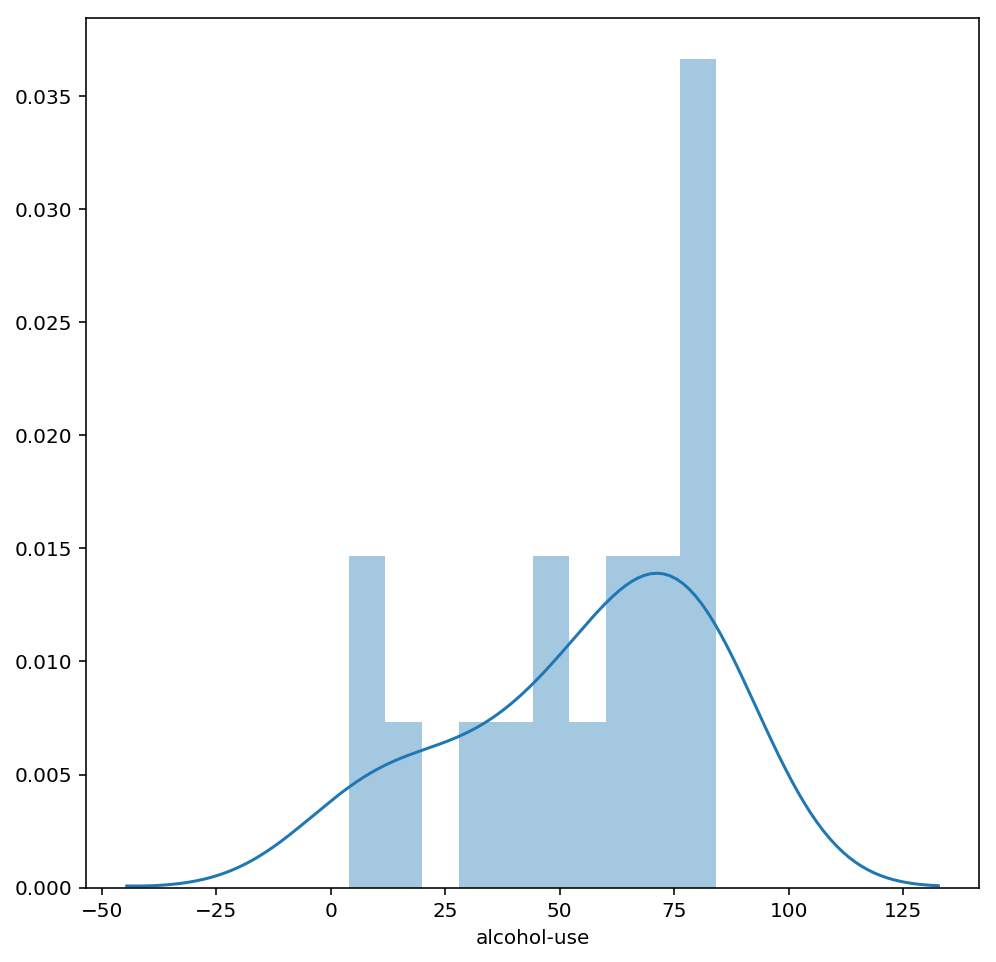

In [213]:
plt.figure(figsize= (8,8))
sns.distplot(drug_df['alcohol-use'],bins =10)

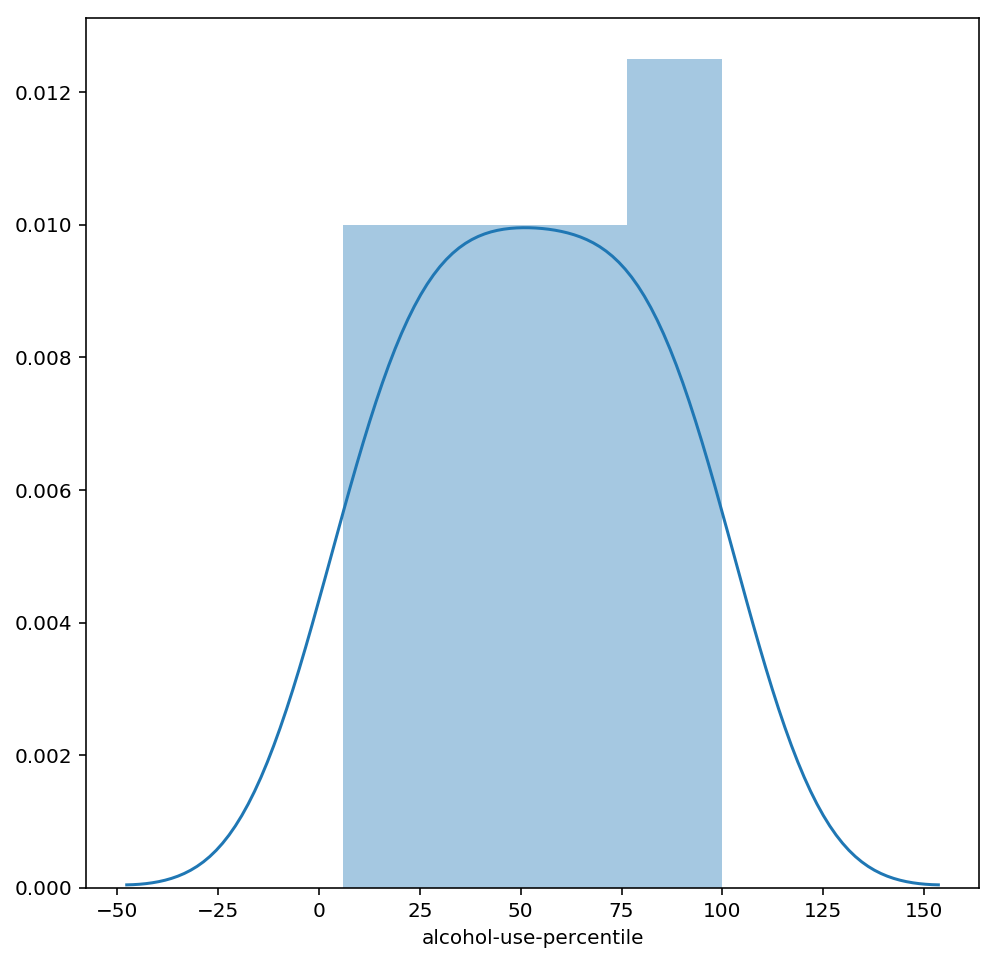

In [217]:
plt.figure(figsize= (8,8))
sns.distplot(drug_df['alcohol-use-percentile'],bins=4)